# Classification

In [1]:
from mlp import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from data_processing import get_all_images_in_folder

plt.rcParams["figure.figsize"] = (10, 10)

loss = False


0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


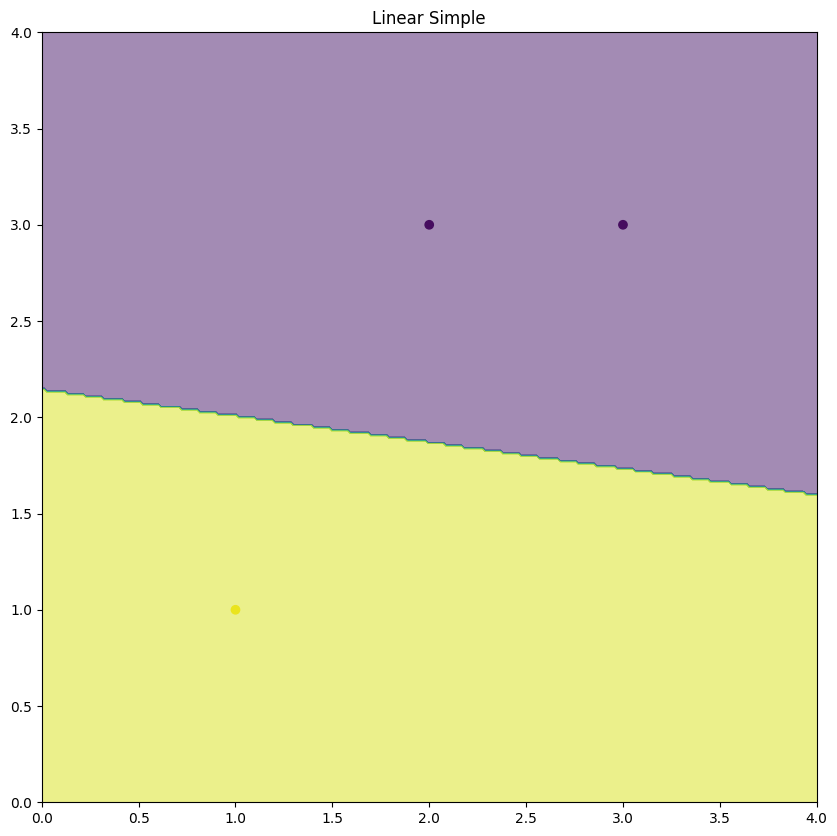

<Figure size 1000x1000 with 0 Axes>

In [2]:
# Linear Simple
# MLP (2, 1)   : OK
npl = (2, 1)
mlp = MLP(npl)
mlp.init()

training_dataset = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
labels = np.array([
    [1.0],
    [-1.0],
    [-1.0]
])
res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 10000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if mlp.predict([x, y],True)[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Simple')
plt.show()
plt.clf()


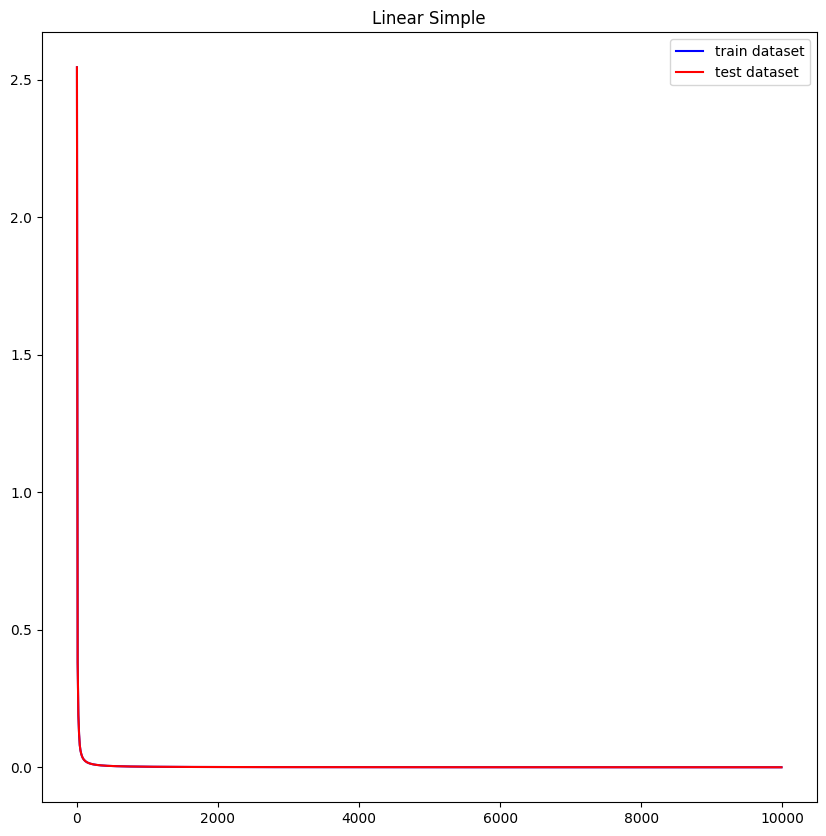

<Figure size 1000x1000 with 0 Axes>

In [3]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Linear Simple')
plt.show()
plt.clf()

2.895557953340183 2.890111651164085
0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


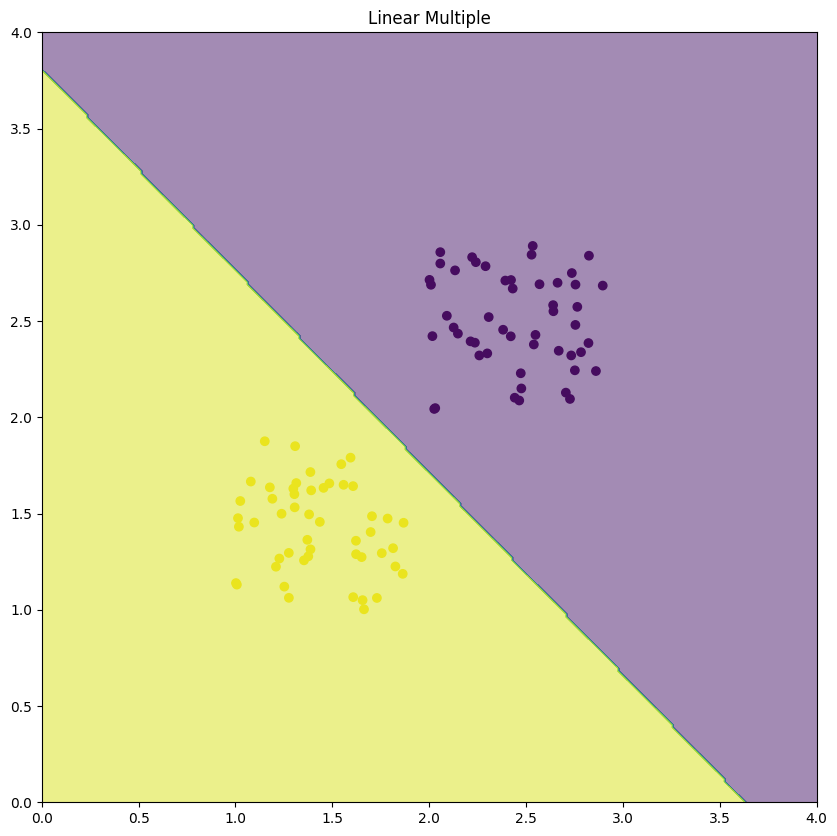

<Figure size 1000x1000 with 0 Axes>

In [4]:
# Linear Multiple :
# MLP (2, 1): OK
npl = (2, 1)
mlp = MLP(npl)
mlp.init()

training_dataset = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
labels = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
print(max(training_dataset[:, 0]), max(training_dataset[:, 1]))
res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 10000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if mlp.predict([x, y],True)[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Multiple')
plt.show()
plt.clf()


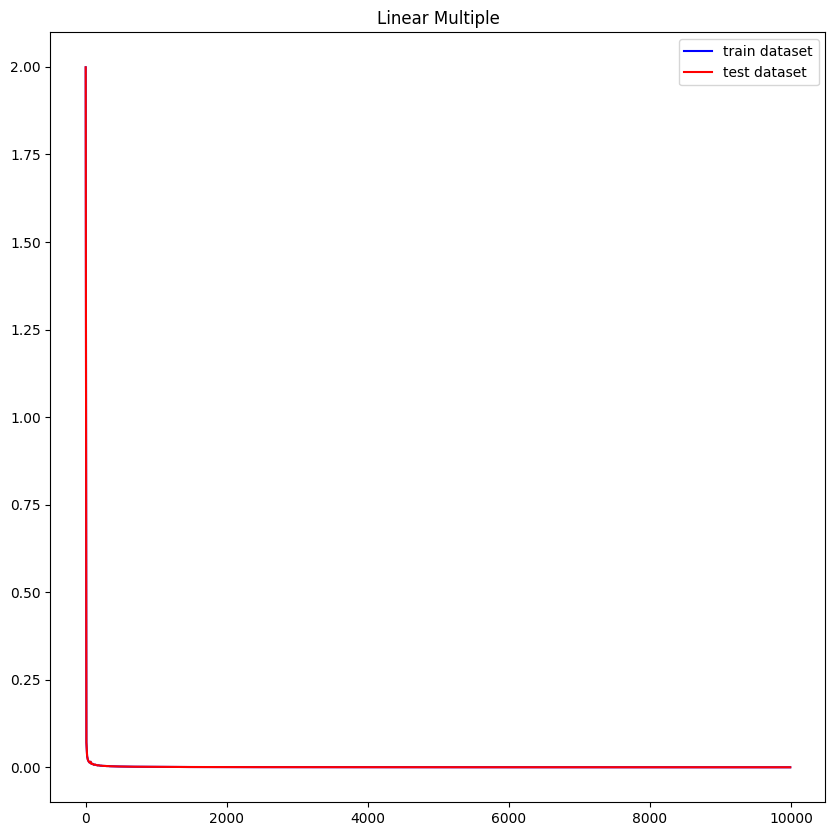

<Figure size 1000x1000 with 0 Axes>

In [5]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Linear Multiple')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


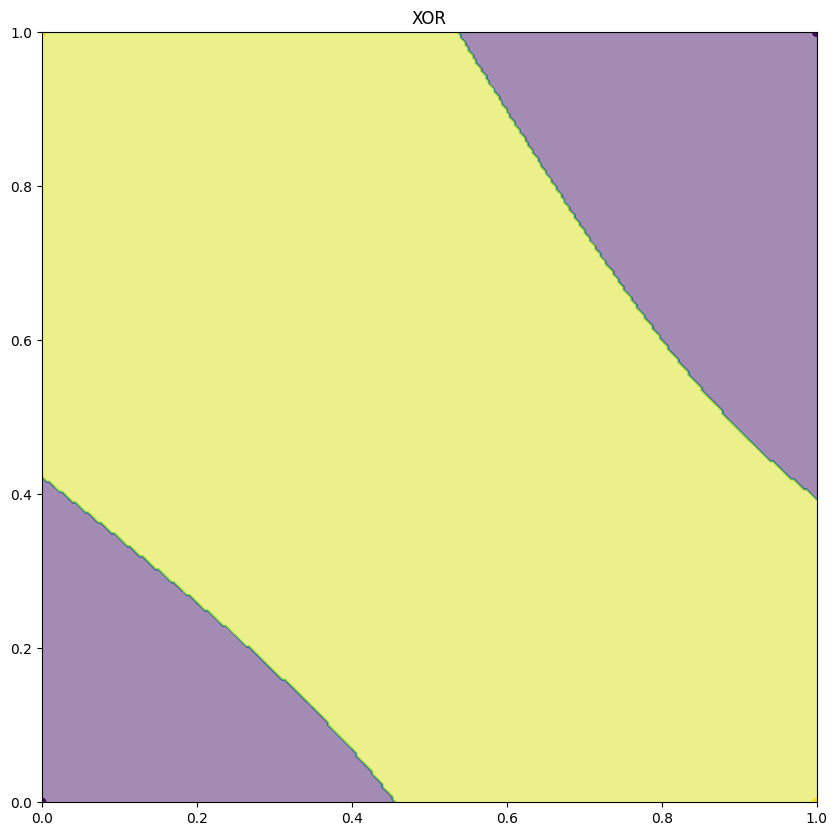

<Figure size 1000x1000 with 0 Axes>

In [6]:
# XOR
# MLP (2, 2, 1): 
npl = (2, 4, 1)
mlp = MLP(npl)
mlp.init()
training_dataset = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
labels = np.array([[1], [1], [-1], [-1]])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
# add background color based on the prediction
x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if mlp.predict([x, y],True)[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('XOR')
plt.show()
plt.clf()



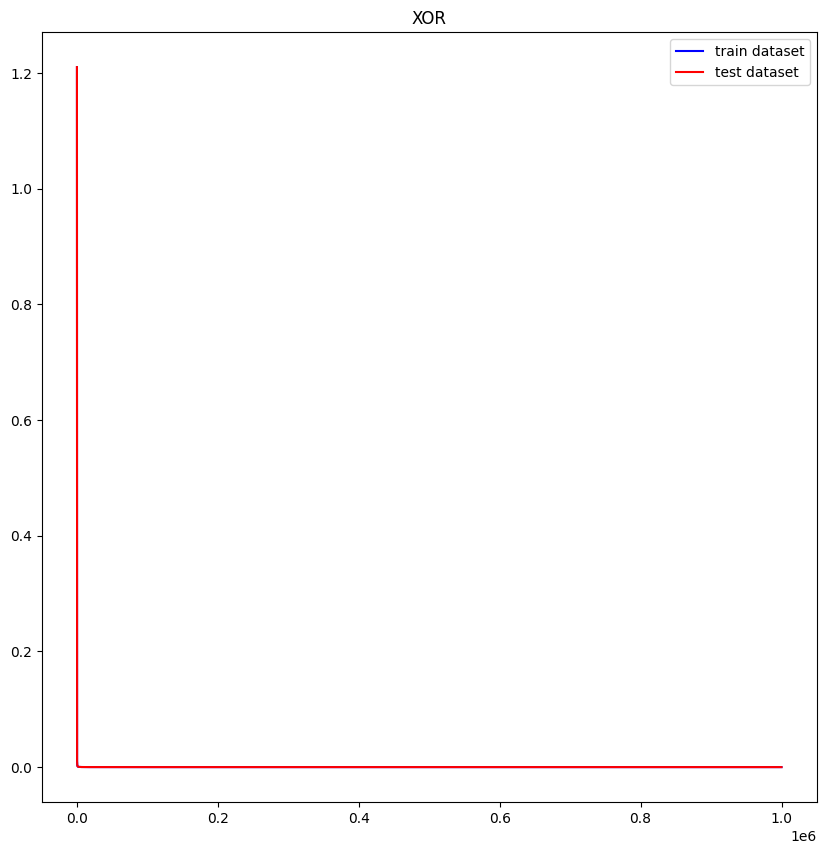

<Figure size 1000x1000 with 0 Axes>

In [7]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('XOR')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


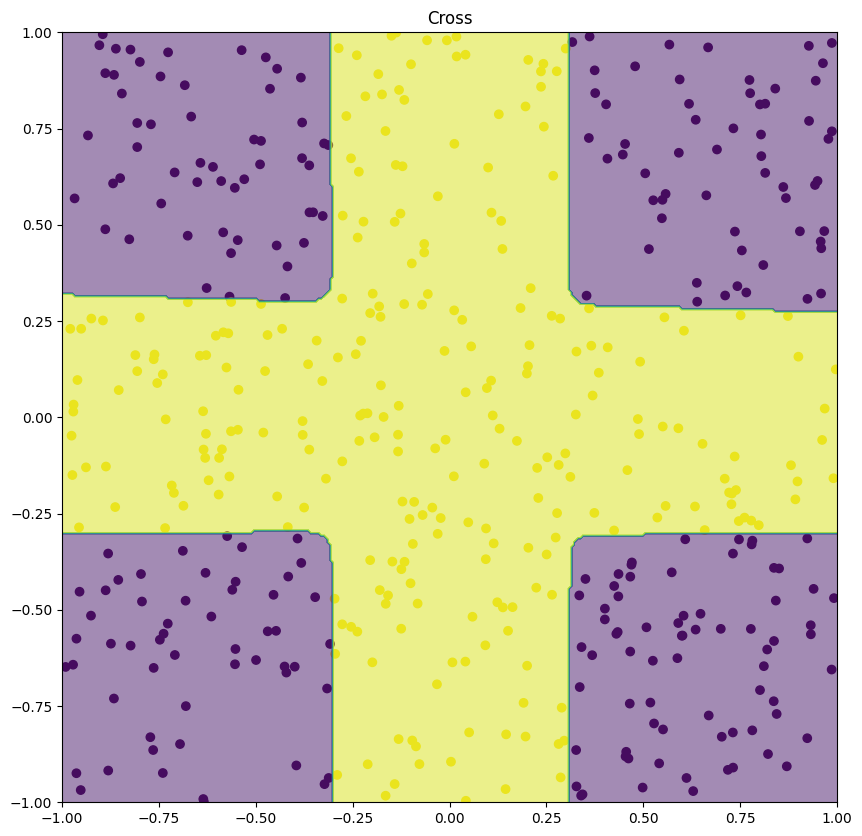

<Figure size 1000x1000 with 0 Axes>

In [8]:
# Cross
# MLP (2, 4, 1)
npl = (2, 4, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([[1] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1] for p in training_dataset], dtype=np.float64)

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 10000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
# add background color based on the prediction
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if mlp.predict([x, y],True)[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Cross')
plt.show()
plt.clf()



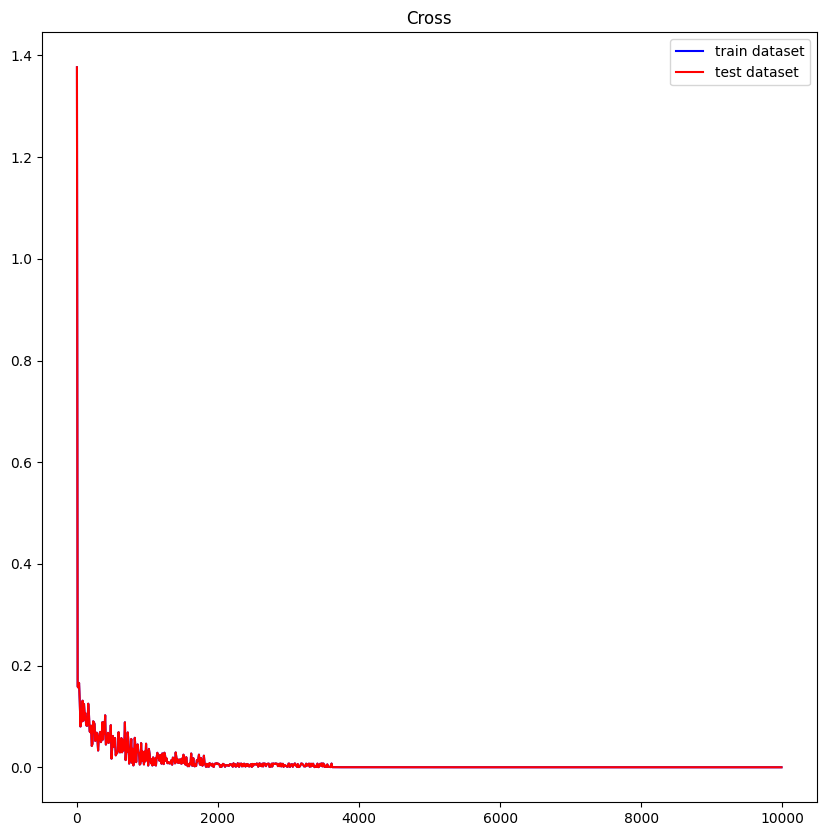

<Figure size 1000x1000 with 0 Axes>

In [9]:

plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Cross')
plt.show()
plt.clf()


0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


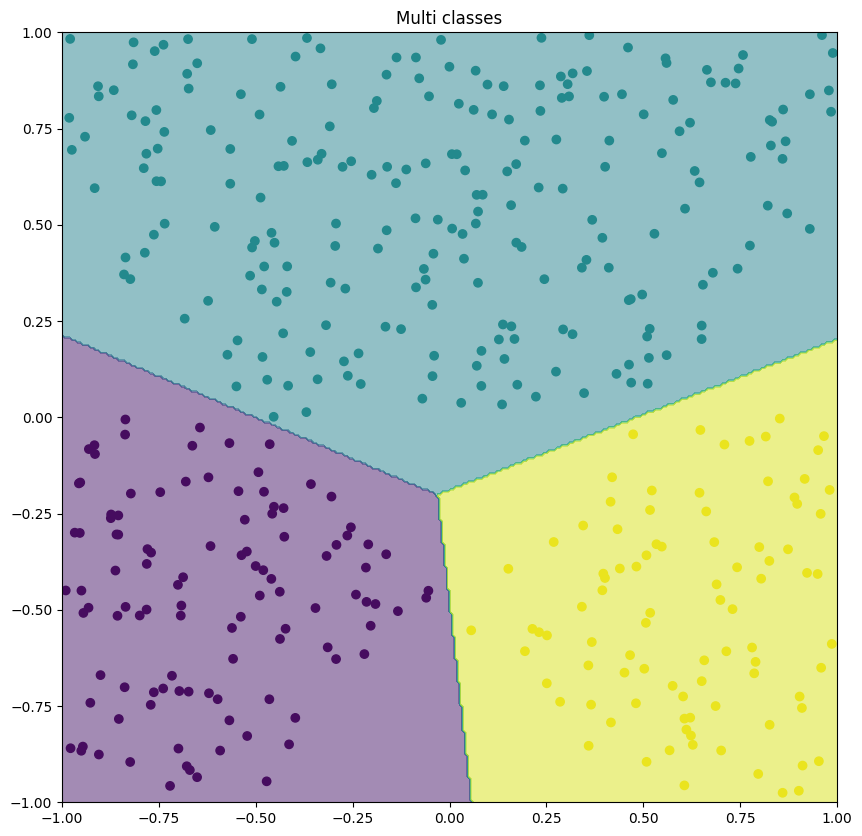

<Figure size 1000x1000 with 0 Axes>

In [10]:
# Multi linear 3 classes
npl = (2, 3)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
                [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
                [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
                [0, 0, 0] for p in X], dtype=np.float64)

training_dataset = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
labels = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[np.argmax(l) for l in labels])
# add background color based on the prediction
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(mlp.predict([x, y],True)) for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Multi classes')
plt.show()
plt.clf()



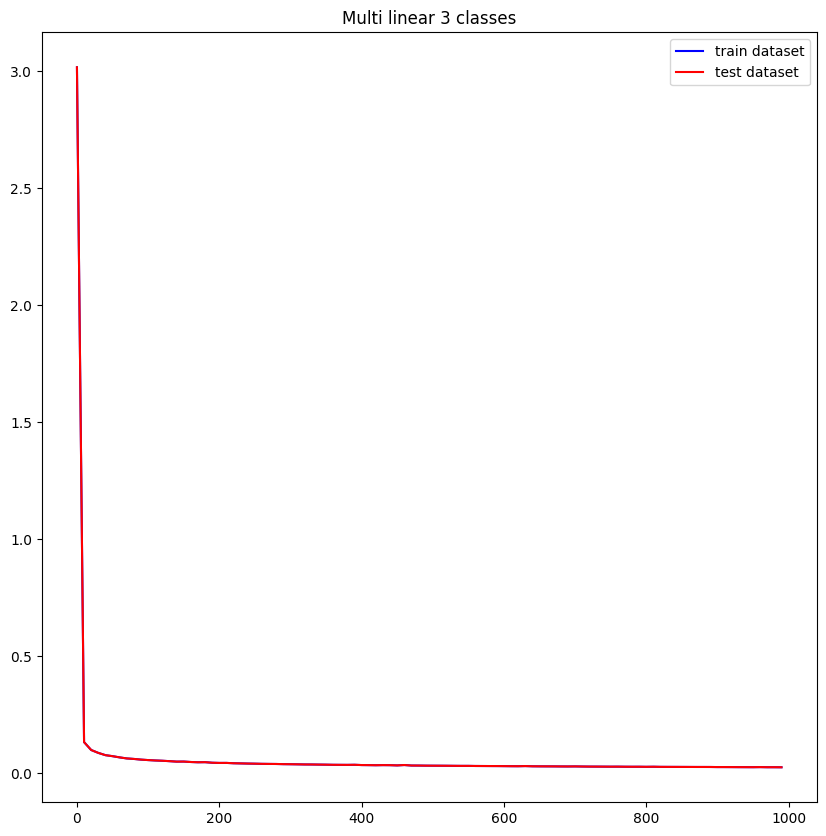

<Figure size 1000x1000 with 0 Axes>

In [11]:

plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Multi linear 3 classes')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


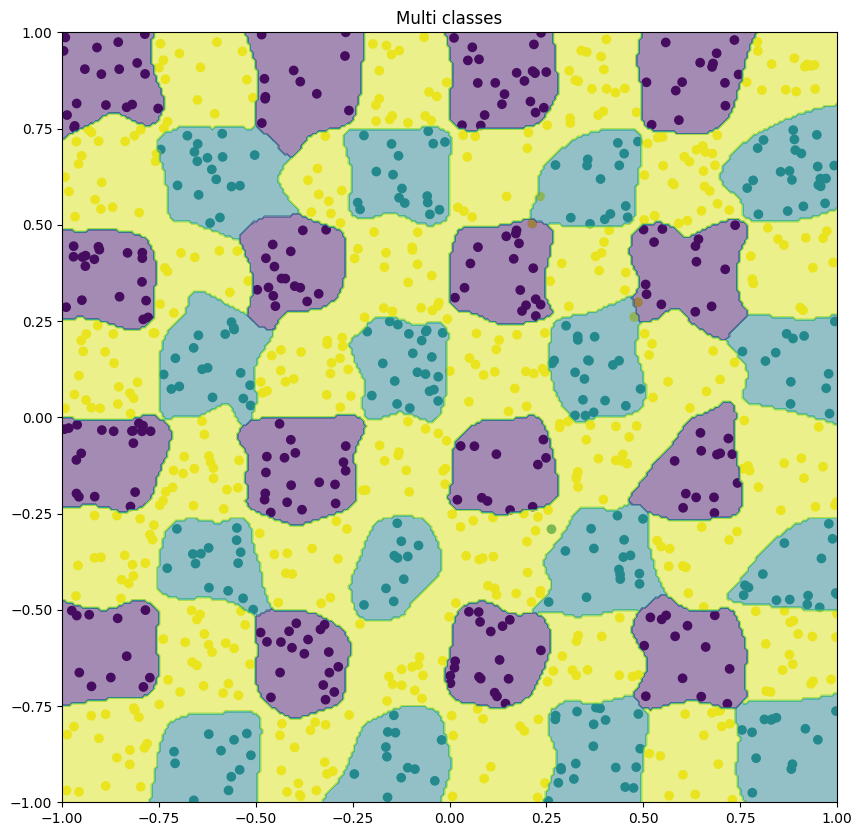

<Figure size 1000x1000 with 0 Axes>

In [12]:
# Multi cross 3 classes
# MLP ?
npl = (2, 100, 100, 3)
mlp = MLP(npl)
mlp.init()

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(
    p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])
Y = np.array(Y, dtype=np.float64)

training_dataset = np.array(X, dtype=np.float64)
labels = np.array(Y, dtype=np.float64)

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.001, 10000, True)
 
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[np.argmax(l) for l in labels])
# add background color based on the prediction
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(mlp.predict([x, y],True)) for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Multi classes')
plt.show()
plt.clf()

In [13]:

# Example usage:
images = get_all_images_in_folder("../datatest")
labels = []
inputs = []
for label, image_vector_ptrs in images.items():
    labels += [label] * len(image_vector_ptrs)
    for image_vector_ptr in image_vector_ptrs:
        image_vector = ctypes.cast(image_vector_ptr, ctypes.POINTER(ctypes.c_double))
        inputs.append(np.ctypeslib.as_array(image_vector, (100 * 100 * 1,)))


if __name__ == "__main__":
    npl = (100 * 100 * 1, 5, 3)
    mlp = MLP(npl)
    mlp.init()

    labels = [
        (
            [1.0, -1.0, -1.0]
            if label == "phidippus"
            else [-1.0, 1.0, -1.0] if label == "tegenaria" else [-1.0, -1.0, 1.0]
        )
        for label in labels
    ]

    # Séparer les données en 3 classes
    class_1_inputs = [
        inputs[i] for i in range(len(inputs)) if labels[i] == [1.0, -1.0, -1.0]
    ]
    class_2_inputs = [
        inputs[i] for i in range(len(inputs)) if labels[i] == [-1.0, 1.0, -1.0]
    ]
    class_3_inputs = [
        inputs[i] for i in range(len(inputs)) if labels[i] == [-1.0, -1.0, 1.0]
    ]

    class_1_labels = [
        labels[i] for i in range(len(labels)) if labels[i] == [1.0, -1.0, -1.0]
    ]
    class_2_labels = [
        labels[i] for i in range(len(labels)) if labels[i] == [-1.0, 1.0, -1.0]
    ]
    class_3_labels = [
        labels[i] for i in range(len(labels)) if labels[i] == [-1.0, -1.0, 1.0]
    ]

    # Mélanger les données de chaque classe
    np.random.shuffle(class_1_inputs)
    np.random.shuffle(class_2_inputs)
    np.random.shuffle(class_3_inputs)

    # Diviser chaque classe en ensembles d'entraînement et de test
    train_inputs_1, test_inputs_1, train_labels_1, test_labels_1 = train_test_split(
        class_1_inputs, class_1_labels, test_size=0.2, random_state=42
    )
    train_inputs_2, test_inputs_2, train_labels_2, test_labels_2 = train_test_split(
        class_2_inputs, class_2_labels, test_size=0.2, random_state=42
    )
    train_inputs_3, test_inputs_3, train_labels_3, test_labels_3 = train_test_split(
        class_3_inputs, class_3_labels, test_size=0.2, random_state=42
    )

    # Combiner les ensembles d'entraînement et de test
    training_inputs = train_inputs_1 + train_inputs_2 + train_inputs_3
    training_labels = train_labels_1 + train_labels_2 + train_labels_3
    testing_inputs = test_inputs_1 + test_inputs_2 + test_inputs_3
    testing_labels = test_labels_1 + test_labels_2 + test_labels_3

    # Normalize the dataset
    x_train_mean = np.mean(training_inputs, axis=0)
    x_train_std = np.std(training_inputs, axis=0)

    training_inputs = (training_inputs - x_train_mean) / x_train_std
    testing_inputs = (testing_inputs - x_train_mean) / x_train_std

    print("Training...")
    res = mlp.train(
        training_inputs,
        training_labels,
        testing_inputs,
        testing_labels,
        0.01,
        1000,
        True,
    )

    plt.plot([i * 10 for i in range(len(res))], [r[0] for r in res], color="blue")
    plt.plot([i * 10 for i in range(len(res))], [r[1] for r in res], color="red")
    plt.legend(["train dataset", "test dataset"])
    plt.title("MLP Loss")
    plt.show()
    plt.clf()


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédire pour chaque test input
predictions = np.array([mlp.predict(testing_input, True) for testing_input in testing_inputs])

cm = confusion_matrix(np.argmax(testing_labels, axis=1), np.argmax(predictions, axis=1))

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

NameError: name 'testing_inputs' is not defined

# Regression linéaire

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


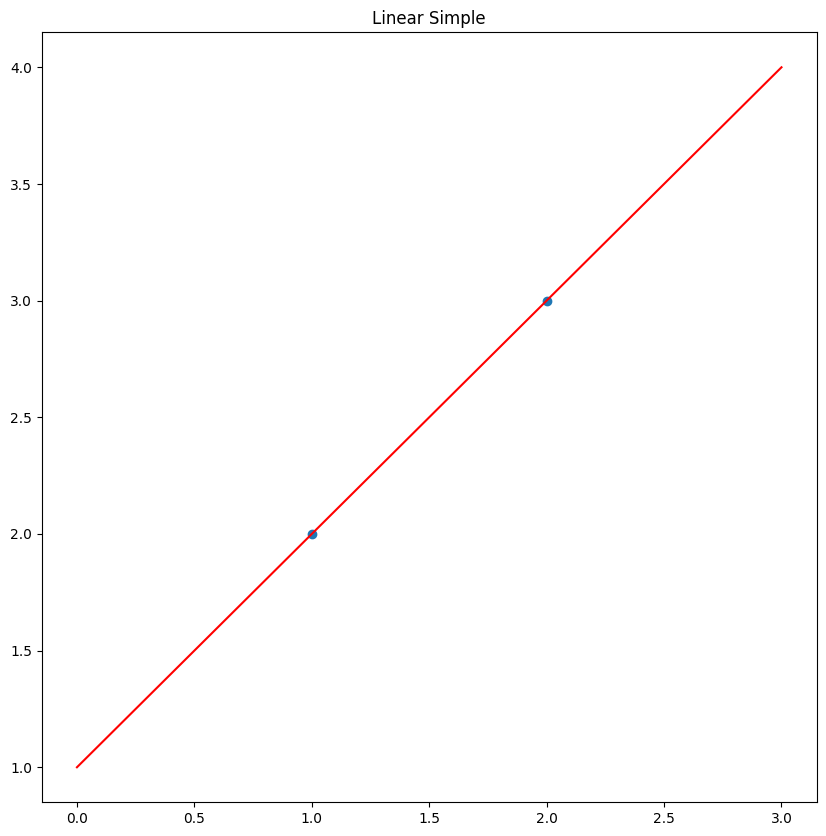

<Figure size 1000x1000 with 0 Axes>

In [15]:
# Linear simple
# MLP (1, 1)   : OK
npl = (1, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.array([
      [1],
      [2]
])
labels = np.array([
      [2],
      [3]
])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000, False)
 
plt.scatter([p[0] for p in training_dataset], [p[0] for p in labels])
# add the prediction line
x = np.linspace(0, 3, 300)
y = np.array([mlp.predict([x], False)[0] for x in x])
plt.plot(x, y, color='red')
plt.title('Linear Simple')
plt.show()
plt.clf()


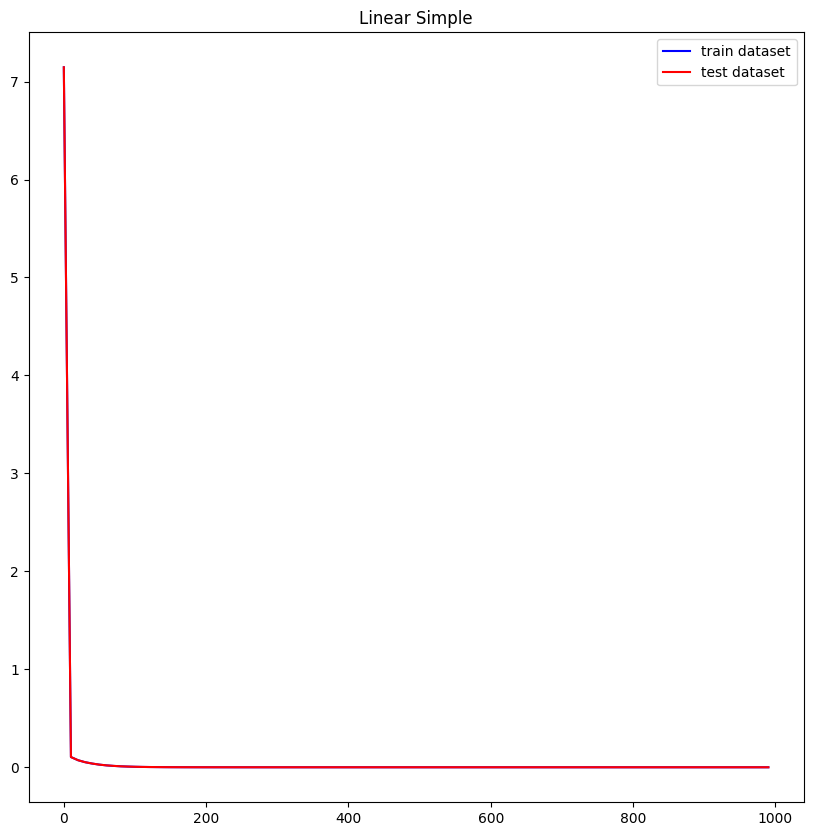

<Figure size 1000x1000 with 0 Axes>

In [16]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Linear Simple')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


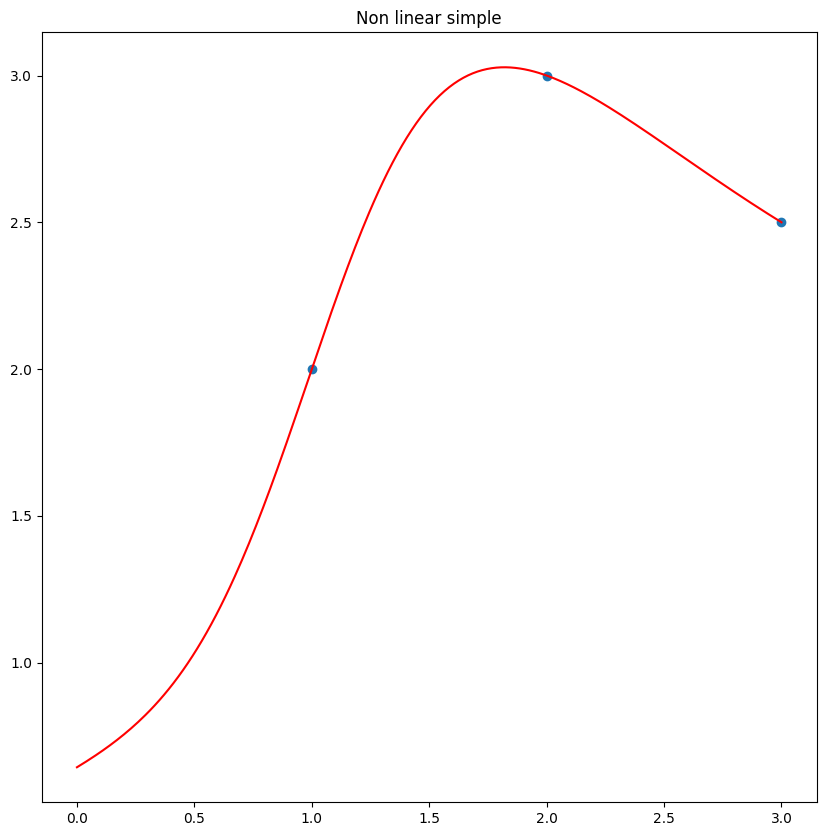

<Figure size 1000x1000 with 0 Axes>

In [17]:
# Non linear simple
# MLP (1, ?, 1)   : OK
npl = (1, 3, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.array([
      [1],
      [2],
      [3]
])
labels = np.array([
      [2],
      [3],
      [2.5]
])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000000, False)
 
plt.scatter([p[0] for p in training_dataset], [p[0] for p in labels])
# add the prediction line
x = np.linspace(0, 3, 300)
y = np.array([mlp.predict([x], False)[0] for x in x])
plt.plot(x, y, color='red')
plt.title('Non linear simple')
plt.show()
plt.clf()

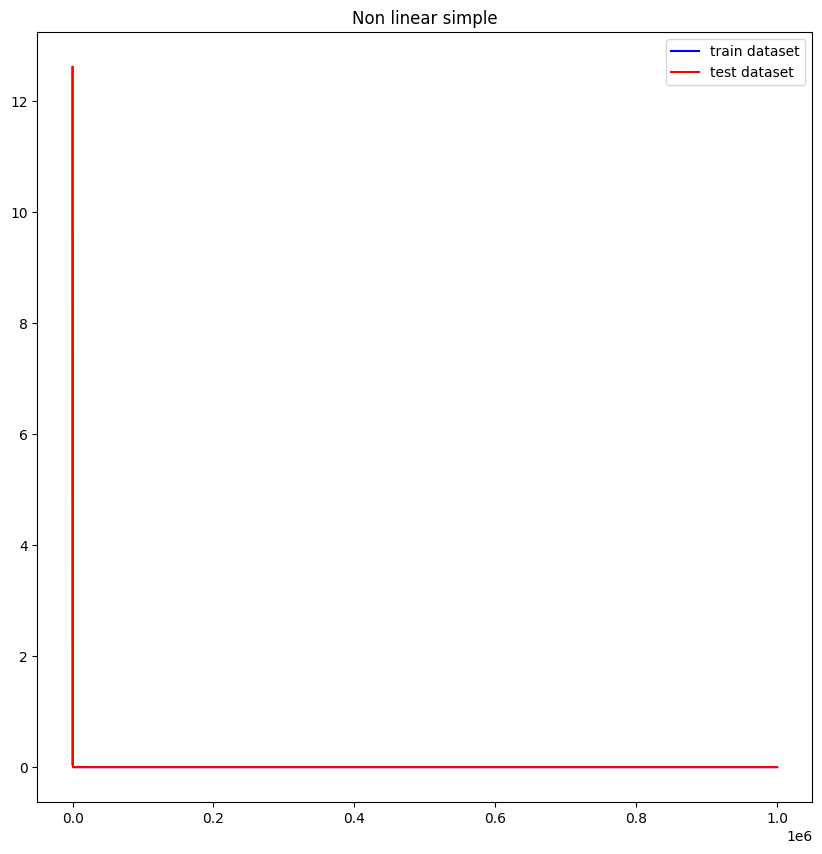

<Figure size 1000x1000 with 0 Axes>

In [18]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Non linear simple')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


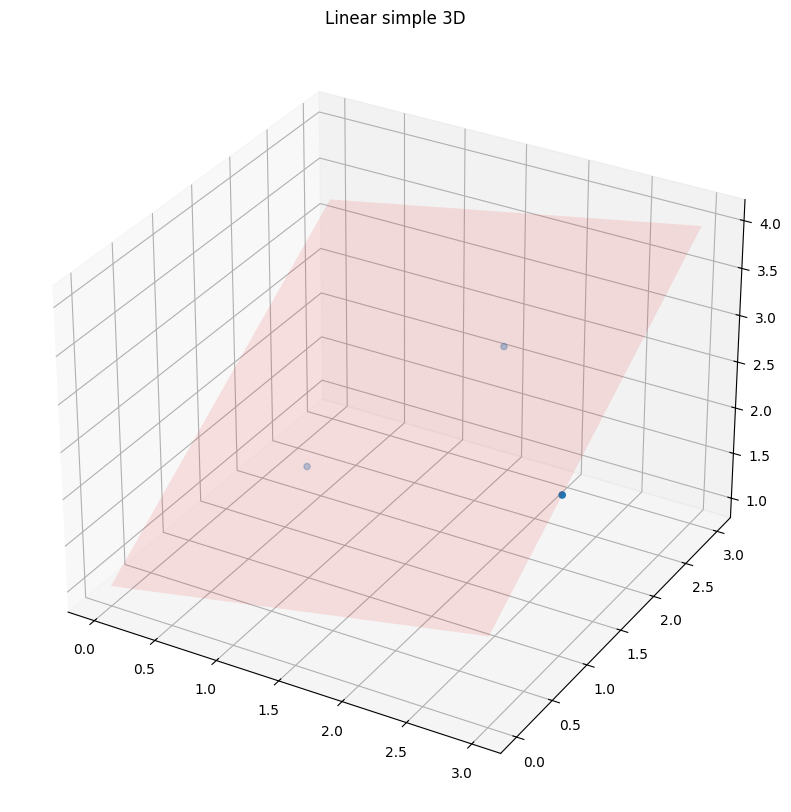

Prediction: 1.9999999999999996, Expected: 2.0
Prediction: 3.0, Expected: 3.0
Prediction: 2.5, Expected: 2.5


<Figure size 1000x1000 with 0 Axes>

In [19]:
# Linear simple 3D
# MLP (2, 1)   : OK
npl = (2, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
labels = np.array([
      [2],
      [3],
      [2.5]
])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000000, False)

# Use 3d plot to show the prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], [l[0] for l in labels])
# add the prediction plane
x = np.linspace(0, 3, 300)
y = np.linspace(0, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[mlp.predict([x, y], False)[0] for x in x] for y in y])
ax.plot_surface(X, Y, Z, alpha=0.1, color='red')
plt.title('Linear simple 3D')
plt.show()
plt.clf()
for i in range(len(training_dataset)):
      print(f"Prediction: {mlp.predict(training_dataset[i], False)[0]}, Expected: {labels[i][0]}")


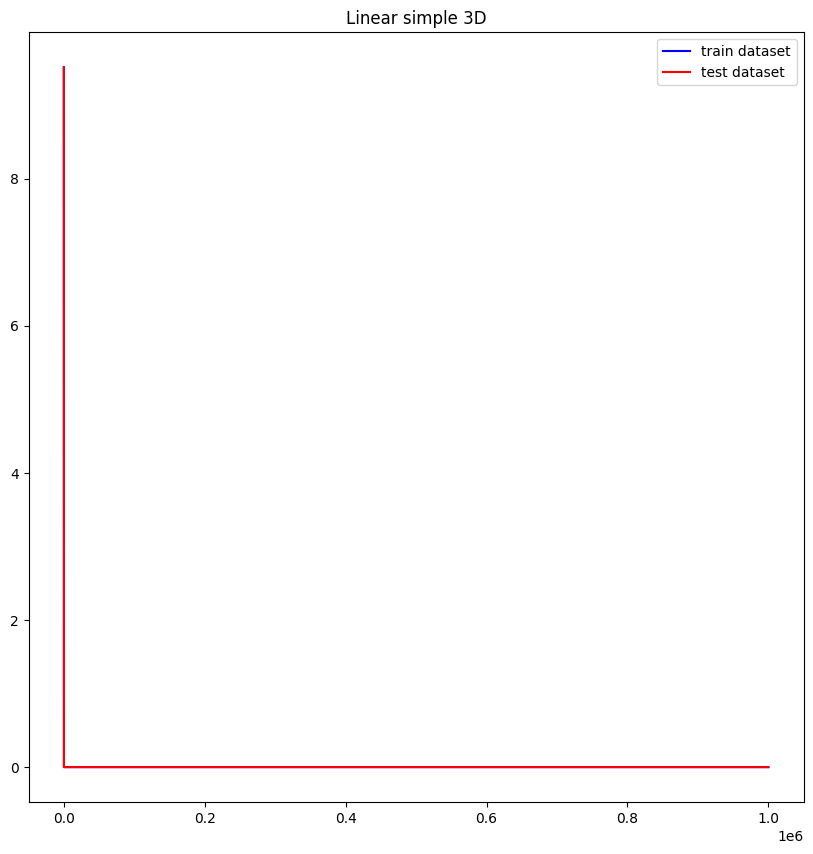

<Figure size 1000x1000 with 0 Axes>

In [20]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Linear simple 3D')
plt.show()
plt.clf()

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


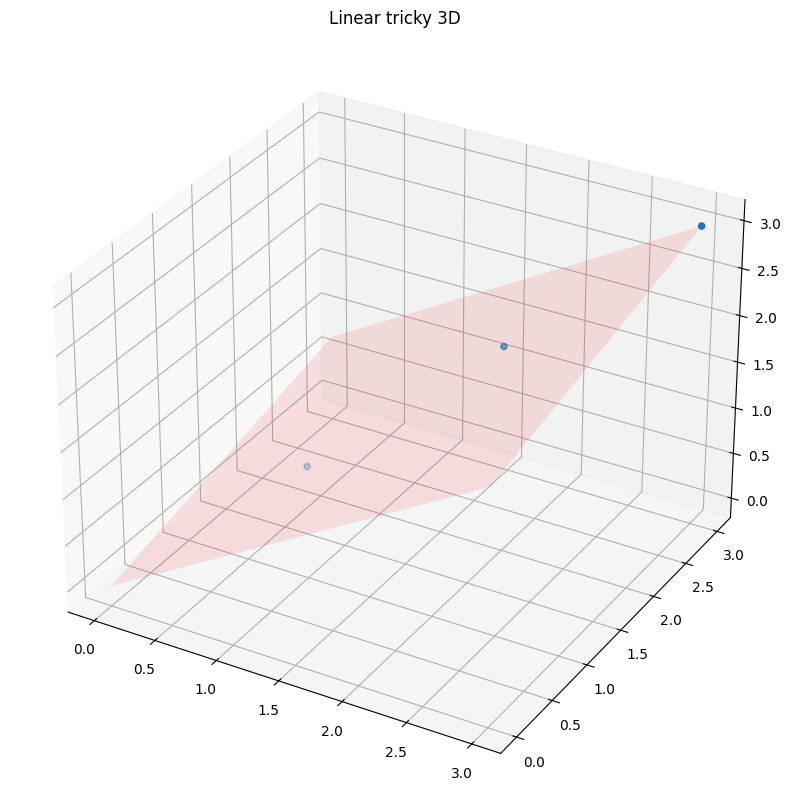

Prediction: 1.0, Expected: 1
Prediction: 2.0, Expected: 2
Prediction: 3.0, Expected: 3


<Figure size 1000x1000 with 0 Axes>

In [21]:
# Linear tricky 3D
# MLP (2, 1)   : OK
npl = (2, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
labels = np.array([
      [1],
      [2],
      [3]
])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000000, False)

# Use 3d plot to show the prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], [l[0] for l in labels])
# add the prediction plane
x = np.linspace(0, 3, 300)
y = np.linspace(0, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[mlp.predict([x, y], False)[0] for x in x] for y in y])
ax.plot_surface(X, Y, Z, alpha=0.1, color='red')
plt.title('Linear tricky 3D')
plt.show()
plt.clf()
for i in range(len(training_dataset)):
      print(f"Prediction: {mlp.predict(training_dataset[i], False)[0]}, Expected: {labels[i][0]}")

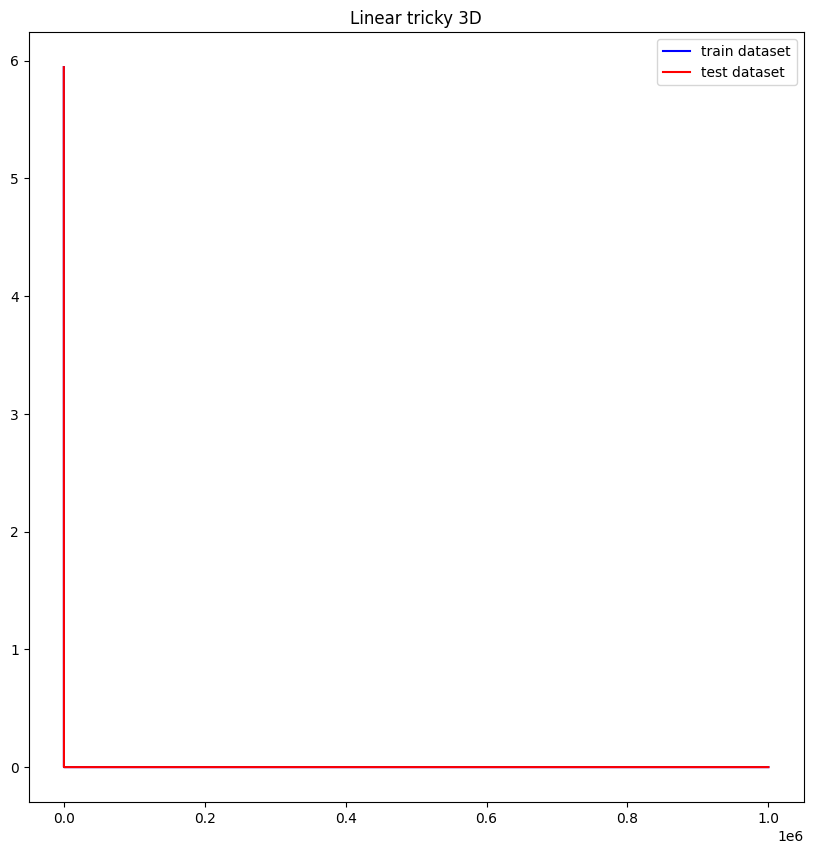

<Figure size 1000x1000 with 0 Axes>

In [22]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Linear tricky 3D')
plt.show()
plt.clf()

# Non linear simple 3D

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


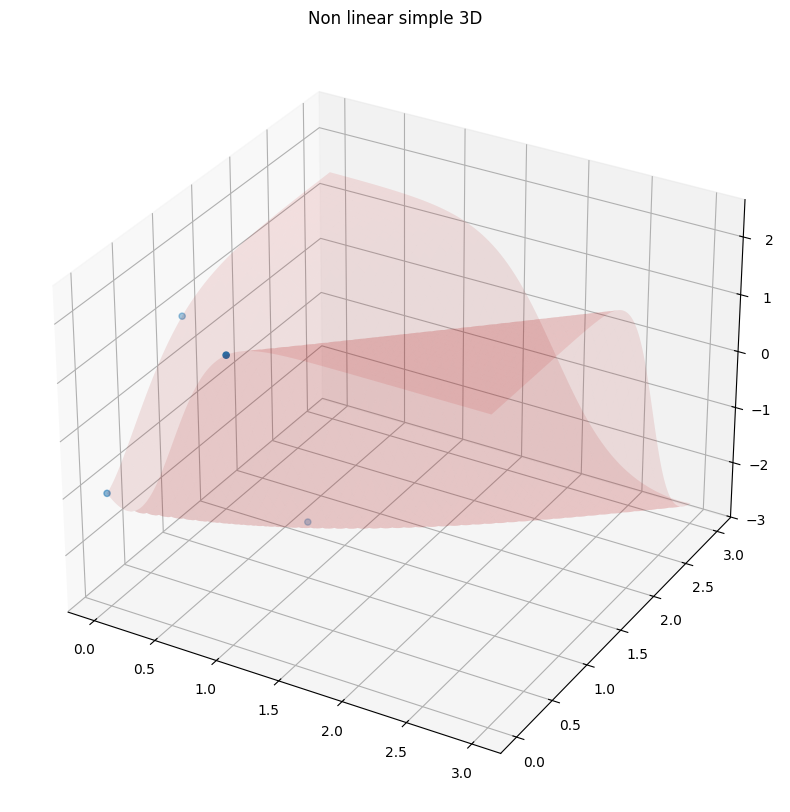

Prediction: 2.0, Expected: 2
Prediction: 0.9999999999999991, Expected: 1
Prediction: -1.9999999999999993, Expected: -2
Prediction: -0.9999999999999999, Expected: -1


<Figure size 1000x1000 with 0 Axes>

In [23]:
# Non linear simple 3D
# MLP (2, 2, 1)   : OK
npl = (2, 2, 1)
mlp = MLP(npl)
mlp.init()

# Initialize the training dataset and labels
training_dataset = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
labels = np.array([
      [2],
      [1],
      [-2],
      [-1]
])

res = mlp.train(training_dataset, labels, training_dataset, labels, 0.1, 1000000, False)

# Use 3d plot to show the prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], [l[0] for l in labels])
# add the prediction plane
x = np.linspace(0, 3, 300)
y = np.linspace(0, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[mlp.predict([x, y], False)[0] for x in x] for y in y])
ax.plot_surface(X, Y, Z, alpha=0.1, color='red')
plt.title('Non linear simple 3D')
plt.show()
plt.clf()
for i in range(len(training_dataset)):
      print(f"Prediction: {mlp.predict(training_dataset[i], False)[0]}, Expected: {labels[i][0]}")

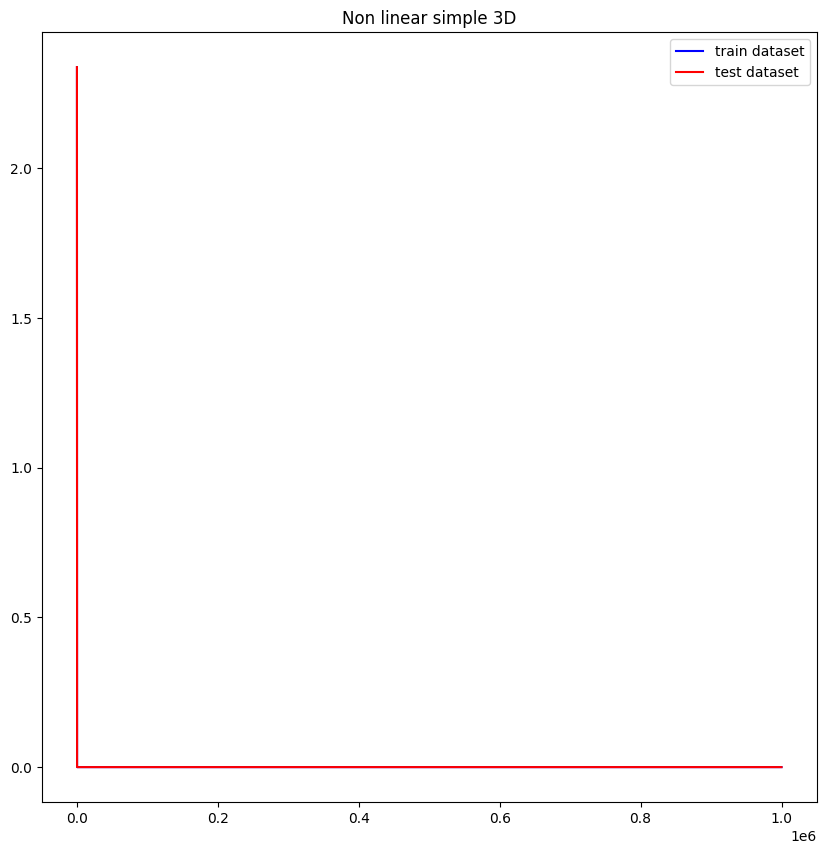

<Figure size 1000x1000 with 0 Axes>

In [24]:
plt.plot([i*10 for i in range(len(res))], [r[0] for r in res], color='blue')
plt.plot([i*10 for i in range(len(res))], [r[1] for r in res], color='red')
plt.legend(['train dataset', 'test dataset'])
plt.title('Non linear simple 3D')
plt.show()
plt.clf()